In [39]:
import pandas as pd
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
import re
import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [40]:
df = pd.read_csv('/home/duvuki/omdena-colombia-socialnetwork/src/data/task-2-preprocessing/merged_data/Final/Corrected_Final_All.csv',  na_filter=True, na_values='[]')

In [41]:
df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id_str,conversation_id_str,full_text,twitter_lang,favorited,retweeted,retweet_count,...,emoji_list,emoticons_list,filename,preprocessed_data_without_hashtags,data_source,lang,score,langTb,lang_langdetect,corrected_preprocessed
0,0,0,2021-03-27T04:09:42+00:00,1.375661e+18,1.375265e+18,@Diputado_Canelo Hagamos otro por el uno de ma...,es,False,False,0.0,...,[''],[':/'],Mayo_SPANISH_tweets_stweet.csv,"['hacer', 'mayo', 'cazar', 'fantasma']",Twitter,es,NaN,NaN,NaN,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,1,1,2021-03-22T21:12:09+00:00,1.374107e+18,1.374107e+18,Después de esperar con ancias el #28F ahora es...,es,False,False,1.0,...,['💙🤍💙'],NaN,Mayo_SPANISH_tweets_stweet.csv,"['despues', 'esperar', 'ancia', 'ahora', 'espe...",Twitter,es,NaN,NaN,NaN,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,2,2,2021-03-22T12:30:53+00:00,1.373975e+18,1.373975e+18,Espero que ésto llegue hasta oídos de la nueva...,es,False,False,0.0,...,[''],NaN,Mayo_SPANISH_tweets_stweet.csv,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia...",Twitter,es,NaN,NaN,NaN,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,3,3,2021-04-04T12:56:55+00:00,1.378693e+18,1.378693e+18,A menos de un mes del #1Mayo Urkullu teme perd...,es,False,False,3.0,...,[''],NaN,Mayo_SPANISH_tweets_stweet.csv,"['menos', 'mes', 'urkullu', 'temer', 'perder',...",Twitter,es,NaN,NaN,NaN,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,4,4,2021-04-03T20:14:57+00:00,1.378441e+18,1.378441e+18,La X Edición del Festival Internacional Un Pue...,es,False,False,1.0,...,[''],"[':/', ':/']",Mayo_SPANISH_tweets_stweet.csv,"['edicion', 'festival', 'internacional', 'puen...",Twitter,es,NaN,NaN,NaN,"['edicion', 'festival', 'internacional', 'puen..."


In [42]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['preprocessed_data_without_hashtags'] = df['preprocessed_data_without_hashtags'].str.replace(char, ' ')

/tmp/ipykernel_166010/1264759976.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['preprocessed_data_without_hashtags'] = df['preprocessed_data_without_hashtags'].str.replace(char, ' ')


In [43]:
#10 most repeated tweets
df.groupby(['preprocessed_data_without_hashtags']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,preprocessed_data_without_hashtags,counts
17220,stamp,112
5706,difundir,88
13710,please help suppo add,52
8341,help u,44
5701,difundan,34
14106,por favor,32
8321,help,29
9249,intervene stop humanrights violatio...,21
15380,removed,21
7940,grande,20


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation to sparse matrix
doc_word= vectorizer.fit_transform(df['preprocessed_data_without_hashtags'].values.astype('U')).toarray()
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words


(22160, 1759)

In [45]:
# Get words that label the columns
words = list(np.asarray(vectorizer.get_feature_names()))


# CorEx Topic Model

### The main parameters of the CorEx topic model are:

#### n_hidden: number of topics ("hidden" as in "hidden latent topics")
#### words: words that label the columns of the doc-word matrix (optional)
#### docs: document labels that label the rows of the doc-word matrix (optional)
#### max_iter: number of iterations to run through the update equations (optional, defaults to 200)
#### verbose: if verbose=1, then CorEx will print the topic TCs with each iteration
#### seed: random number seed to use for model initialization (optional)


In [47]:
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

# CorEx Output

In [48]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=3, n_words=15)

[('one', 0.03558615310772622, 1.0),
 ('like', 0.0299023197484427, 1.0),
 ('get', 0.028245058625944067, 1.0),
 ('i', 0.02493885916980106, 1.0),
 ('think', 0.021536965786588688, 1.0),
 ('see', 0.020760433007477617, 1.0),
 ('many', 0.01788719348093262, 1.0),
 ('time', 0.017259120509297735, 1.0),
 ('much', 0.014634984501005156, 1.0),
 ('lot', 0.014123501685508211, 1.0),
 ('really', 0.013835384893138205, 1.0),
 ('way', 0.013289281917633027, 1.0),
 ('good', 0.013274675463816131, 1.0),
 ('last', 0.012138024593544726, 1.0),
 ('something', 0.011638521233097505, 1.0)]

##### The topic words are those with the highest mutual information with the topic, rather than those with highest probability within the topic as in LDA. The mutual information with the topic is the number reported in each tuple. CorEx also returns the "sign" of each word, which is either 1 or -1. If the sign is -1, then that means the absence of a word is informative in that topic, rather than its presence.

##### If the column labels have not been specified through words, then the code will return the column indices for the top words in each topic.



In [49]:
topics = topic_model.get_topics()
try:
    for topic_n,topic in enumerate(topics):
        # w: word, mi: mutual information, s: sign
        topic = [(w,mi,s) if s > 0 else ('~'+w,mi,s) for w,mi,s in topic]
        # Unpack the info about the topic
        words,mis,signs = zip(*topic)    
        # Print topic
        topic_str = str(topic_n+1)+': '+', '.join(words)
        print(topic_str)
except:
    print('exception')

1: police, right, protester, human, force, take, violence, amp, make, state
2: people, government, colombian, protest, colombia, kill, go, day, know, want
3: tax, reform, would, even, thing, money, increase, pay, year, could
4: one, like, get, i, think, see, many, time, much, lot
5: creer, tener, problema, impuesto, forma, politica, dinero, ejemplo, acuerdo, existir
6: policia, derecho, ser, gobierno, joven, colombiano, civil, humanos, asesinado, deber
7: idea, dialogo, participar, educacion, publico, empresa, situacion, tema, cambio, sistema
8: hacer, ir, pais, ver, querer, decir, salir, asi, dejar, ahora
9: gente, cosa, mismo, bien, buen, menos, pensar, mal, malo, siempre
10: él, si, solo, vez, poner, cada, medio, hecho, mejor, alguno
11: martuchis, vicky, roman, paraco, velez, uribe, polo, espriella, escobar, bolivar
12: primero, linea, hoy, resistencia, vida, nuevo, jornada, portal, mayo, realizar
13: help, please, u, need, suppo, add, come, spread, thanks, thank
14: protesta, dia,

# Total Correlation and Model Selection

In [50]:
topic_model.tc 

3.4679951788079384

In [51]:
topic_model.tcs.shape # k_topics

(50,)

In [52]:
print(np.sum(topic_model.tcs))
print(topic_model.tc)

3.4679951788079384
3.4679951788079384


## Selecting the Number of Topics
#### One way to choose the number of topics is to observe the distribution of TCs for each topic to see how much each additional topic contributes to the overall TC. We should keep adding topics until additional topics do not significantly contribute to the overall TC. This is similar to choosing a cutoff eigenvalue when doing topic modeling via LSA.

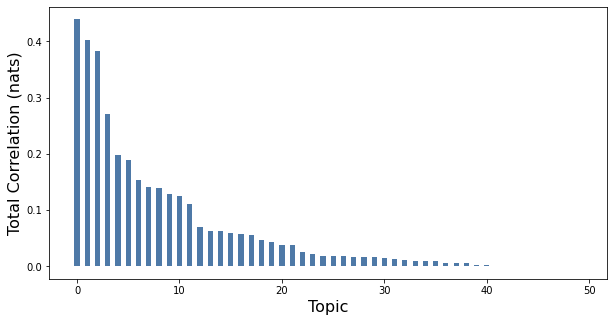

In [53]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

# Resources

### https://github.com/gregversteeg/CorEx

### https://ryanjgallagher.github.io/code/corex/example